# Satellite Image Analysis: Band Analysis

[RasterIO](https://rasterio.readthedocs.io/en/stable/) is used along with [EarthPy](https://earthpy.readthedocs.io/en/latest/index.html) to load an process the TIFF images separated in different bands.

Note that EarthPy has [example datasets](https://earthpy.readthedocs.io/en/latest/earthpy-data-subsets.html).

#### Table of Contents

0. Sentinel-2 Bands
1. Imports
2. Visualize Data
3. Band Combinations
    - 3.1 Vegetation and Soil Indices
        - Normalized Difference Vegetation Index (NDVI)
        - Soil-Adjusted Vegetation Index (SAVI)
        - Visible Atmospherically Resistant Index (VARI)
        - Distribution of NDVI, SAVI, and VARI pixel values
    - 3.2 Water Indices
        - Modified Normalized Difference Water Index (MNDWI)
        - Normalized Difference Moisture Index (NDMI)
    - 3.3 Geology Indices
        - Clay Minerals
        - Ferrous Minerals


## 0. Sentinel-2 Bands

Sentinel-2 consists of 2 satellites (Sentinel 2A and 2B). Sentinel-2 carries the Multispectral Imager (MSI). This sensor delivers 13 spectral bands ranging from 10 to 60-meter pixel size.

| Band | Resolution | Central Wavelength | Description |
| --- | --- | --- | --- | --- | 
| B1 | 60 m | 443 nm| Ultra Blue (Coastal and Aerosol) |
| B2 | 10 m | 490 nm | Blue |
| B3 | 10 m | 560 nm | Green |
| B4 | 10 m | 665 nm | Red |
| B5 | 20 m | 705 nm | Visible and Near Infrared (VNIR) |
| B6 | 20 m | 740 nm | Visible and Near Infrared (VNIR) |
| B7 | 20 m | 783 nm | Visible and Near Infrared (VNIR) |
| B8 | 10 m | 842 nm | Visible and Near Infrared (VNIR) |
| B8a | 20 m | 865 nm | Visible and Near Infrared (VNIR) |
| B9 | 60 m | 940 nm | Short Wave Infrared (SWIR) |
| B10 | 60 m | 1375 nm | Short Wave Infrared (SWIR) |
| B11 | 20 m | 1610 nm | Short Wave Infrared (SWIR) |
| B12 | 20 m | 2190 nm | Short Wave Infrared (SWIR) |

Band combinations provide relevant information related to geological and vegetation information, as one can see in [Sentinel Playground](https://www.sentinel-hub.com/explore/sentinelplayground/).

Important band combinations:

- RGB colors: B4, B3, B2.
- Color infrared: B8, B4, B3.
    - Healthy dense vegetation appears very red.
    - Buildings, white.
- Short-Wave Infrared (SWIR): B12, B8A, B4.
    - Darker green: more dense vegetation.
    - Brown: bare soil.
- Agriculture: B11, B8, B2.
    - Dense vegetation: dark green.
- Geology: B12, B11, B2.
    - Lithology, geological formations.
- Bathymetric: B4, B3, B1.
    - Suspended sediments in water.
- Vegetation Index: (B8-B4)/(B8+B4).
    - High values: dense canopy.
    - Low values: urban, water.
- Moisture Index: (B8A-B11)/(B8A+B11).
    - Water stress in plants if low value.

More information:

- [Sentinel 2 Bands and Combinations](https://gisgeography.com/sentinel-2-bands-combinations/)
- [How to Download Free Sentinel Satellite Data](https://gisgeography.com/how-to-download-sentinel-satellite-data/)
- [100 Earth Shattering Remote Sensing Applications & Uses](https://gisgeography.com/remote-sensing-applications/)
- [Spectral Signature Cheatsheet](https://gisgeography.com/spectral-signature/)

## 1. Imports

In [3]:
from glob import glob

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

import rasterio as rio
from rasterio.plot import plotting_extent
from rasterio.plot import show
from rasterio.plot import reshape_as_raster, reshape_as_image

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

## 2. Visualize Data

In [4]:
DATA_PATH = "../data/Satellite_Imagery/"

In [5]:
sentinel_bands = glob(DATA_PATH+"sundarbans_data/*B?*.tiff")

In [6]:
sentinel_bands.sort()
sentinel_bands

['../data/Satellite_Imagery/sundarbans_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B01_(Raw).tiff',
 '../data/Satellite_Imagery/sundarbans_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B02_(Raw).tiff',
 '../data/Satellite_Imagery/sundarbans_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B03_(Raw).tiff',
 '../data/Satellite_Imagery/sundarbans_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B04_(Raw).tiff',
 '../data/Satellite_Imagery/sundarbans_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B05_(Raw).tiff',
 '../data/Satellite_Imagery/sundarbans_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B06_(Raw).tiff',
 '../data/Satellite_Imagery/sundarbans_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B07_(Raw).tiff',
 '../data/Satellite_Imagery/sundarbans_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B08_(Raw).tiff',
 '../data/Satellite_Imagery/sundarbans_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B09_(Raw).tiff',
 '../data/

In [7]:
# Open rasters with Rasterio
images = []
for i in sentinel_bands:
    with rio.open(i, 'r') as f:
        images.append(f.read(1))

In [8]:
images_array = np.stack(images)

In [9]:
# 12 bands/channels with images of size (h,w) = (954, 298)
images_array.shape

(12, 954, 298)

In [10]:
type(images_array)

numpy.ndarray

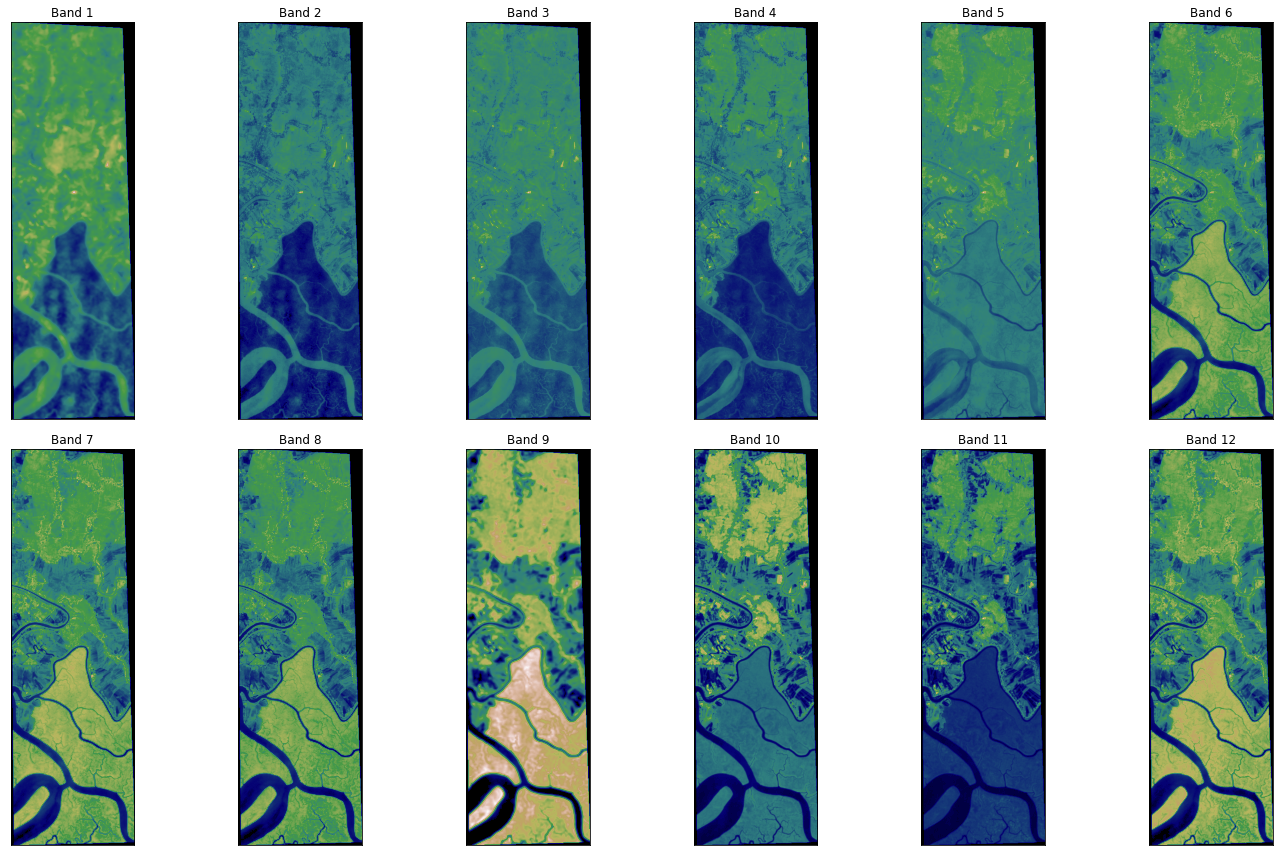

In [12]:
# Plot all bands
ep.plot_bands(images_array, cmap = 'gist_earth', figsize = (20, 12), cols = 6, cbar = False)
plt.show()

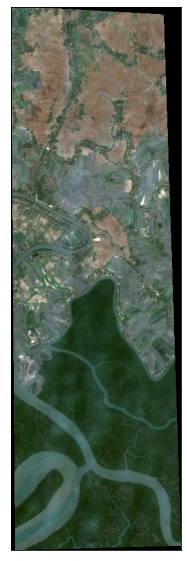

In [13]:
# Plot RGB image
rgb = ep.plot_rgb(images_array, 
                  rgb=(3,2,1), # (default = (0, 1, 2))) indices of the three RGB bands,
                  stretch=True, # apply linear stretch
                  str_clip=0.02, # pcnt of clip in linar stretch, default 2 = 2%
                  figsize=(8, 10))
plt.show()

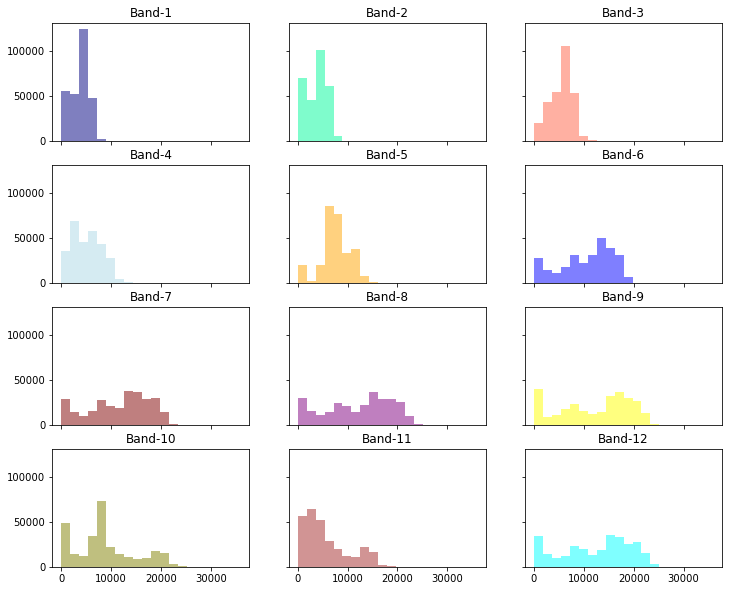

In [14]:
# Pixel value distributions: histograms
colors = ['navy', 'MediumSpringGreen', 'tomato', 'lightblue', 'orange', 'blue',
          'maroon', 'purple', 'yellow', 'olive', 'brown', 'cyan']
ep.hist(images_array, 
        colors = colors,
        title=[f'Band-{i}' for i in range(1, 13)], 
        cols=3, 
        alpha=0.5, 
        figsize=(12, 10))
plt.show()

## 3. Band Combinations

### 3.1 Vegetation and Soil Indices

#### Normalized Difference Vegetation Index (NDVI)

- NIR = pixel values from the near-infrared band
- Red = pixel values from the red band
- NDVI = ((NIR - Red)/(NIR + Red))

In [19]:
ndvi = es.normalized_diff(images_array[7], images_array[3])

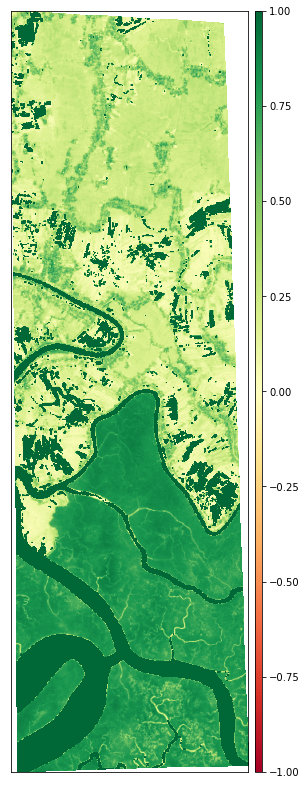

In [21]:
ep.plot_bands(ndvi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))
plt.show()

#### Soil-Adjusted Vegetation Index (SAVI)

- NIR = pixel values from the near infrared band
- Red = pixel values from the near red band
- L = amount of green vegetation cover
- SAVI = ((NIR - Red) / (NIR + Red + L)) x (1 + L)

In [17]:
L = 0.5
savi = ((images_array[7] - images_array[3]) / (images_array[7] + images_array[3] + L)) * (1 + L)

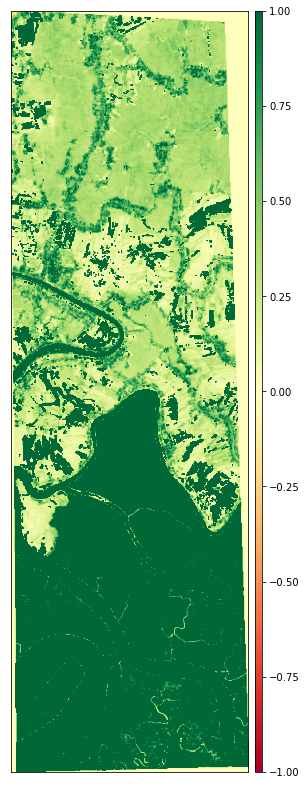

In [22]:
ep.plot_bands(savi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))
plt.show()

#### Visible Atmospherically Resistant Index (VARI)

- Green = pixel values from the green band
- Red = pixel values from the red band
- Blue = pixel values from the blue band
- VARI = (Green - Red)/ (Green + Red - Blue)

In [23]:
vari = (images_array[2] - images_array[3])/ (images_array[2] + images_array[3] - images_array[1])

/Users/mxagar/opt/anaconda3/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


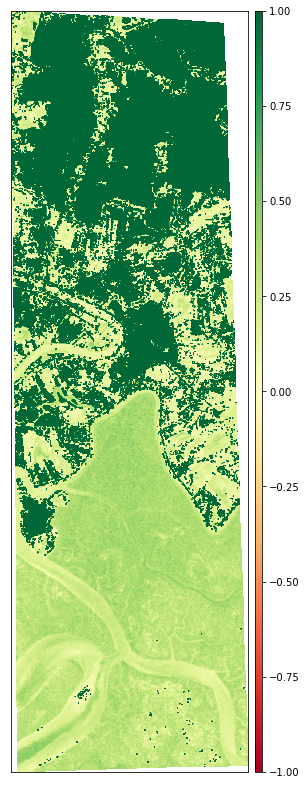

In [25]:
ep.plot_bands(vari, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))
plt.show()

#### Distribution of NDVI, SAVI, and VARI pixel values

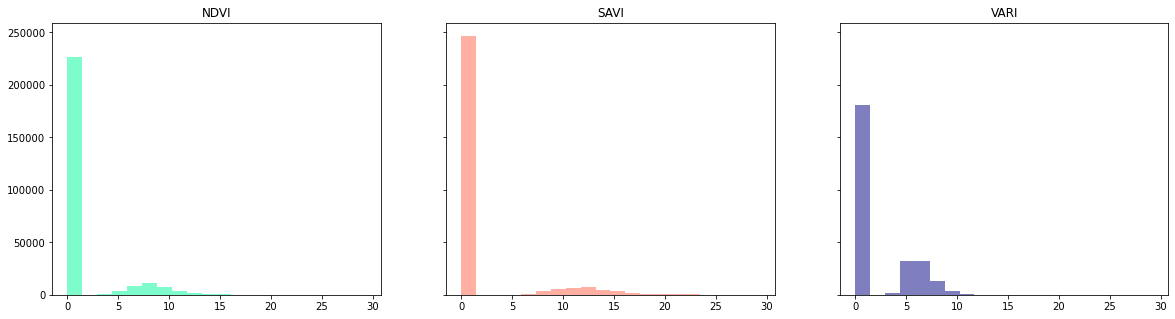

In [26]:
ep.hist(np.stack([ndvi, savi, vari]), 
        alpha=0.5,
        cols=3, 
        figsize=(20, 5),
        title = ['NDVI', 'SAVI', 'VARI'],
        colors = ['mediumspringgreen', 'tomato', 'navy'])
plt.show()

### 3.2 Water Indices

#### Modified Normalized Difference Water Index (MNDWI)

- Green = pixel values from the green band
- SWIR = pixel values from the short-wave infrared band
- MNDWI = (Green - SWIR) / (Green + SWIR)

In [27]:
mndwi = es.normalized_diff(images_array[2], images_array[10])

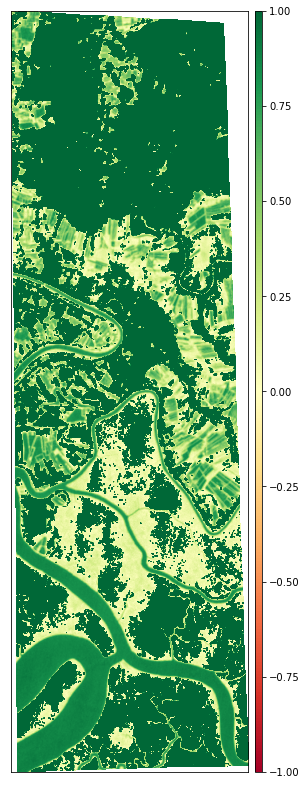

In [28]:
ep.plot_bands(mndwi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))
plt.show()

#### Normalized Difference Moisture Index (NDMI)

- NIR = pixel values from the near infrared band
- SWIR1 = pixel values from the short-wave infrared 1 band
- NDMI = (NIR - SWIR1)/(NIR + SWIR1)

In [29]:
ndmi = es.normalized_diff(images_array[7], images_array[10])

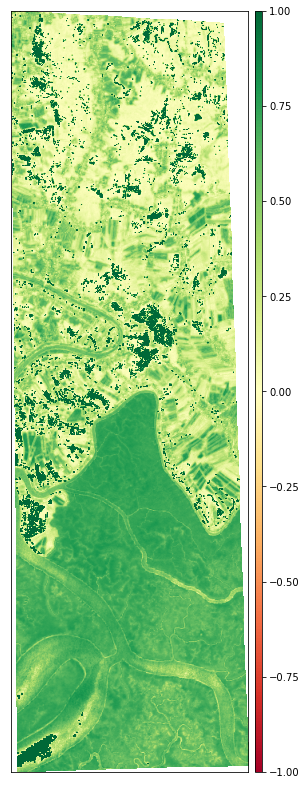

In [30]:
ep.plot_bands(ndmi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))
plt.show()

### 3.3 Geology Indices

#### Clay Minerals

- SWIR1 = pixel values from the short-wave infrared 1 band
- SWIR2 = pixel values from the short-wave infrared 2 band
- Clay Minerals Ratio = SWIR1 / SWIR2

In [31]:
cmr = np.divide(images_array[10], images_array[11])

/Users/mxagar/opt/anaconda3/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/Users/mxagar/opt/anaconda3/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


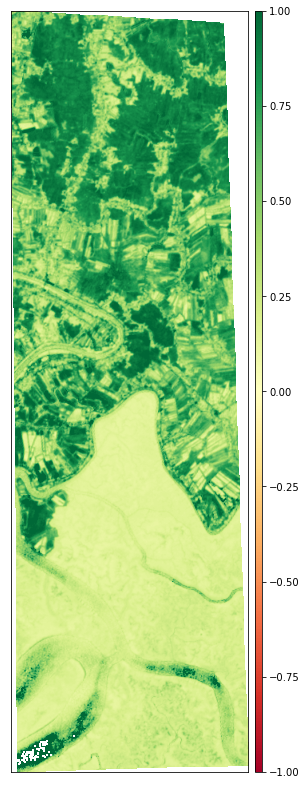

In [32]:
ep.plot_bands(cmr, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))
plt.show()

#### Ferrous Minerals

- SWIR = pixel values from the short-wave infrared band
- NIR = pixel values from the near infrared band
- Ferrous Minerals Ratio = SWIR / NIR

In [33]:
fmr = np.divide(images_array[10], images_array[7])

/Users/mxagar/opt/anaconda3/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


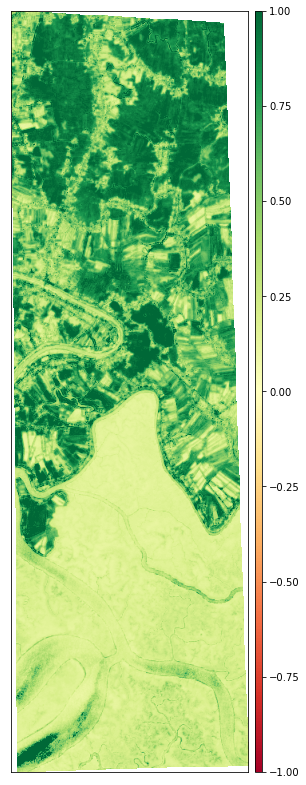

In [35]:
ep.plot_bands(fmr, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))
plt.show()